<a href="https://colab.research.google.com/github/Akarsh-20/Akarsh_INFO5731_UNT/blob/main/INFO5731_Assignment_Four_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [3]:
!pip install gensim
!pip install nltk

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('Sentiment_Analysis_Assignment-5.csv')

# Function for tokenization and preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

txtcol = df.select_dtypes(include=['object']).columns[0]
df['tokens'] = df[txtcol].apply(preprocess)

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(df['tokens'])

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the top 10 topics
for topic_id, words in lda_model.print_topics(num_topics=10):
    print(f"Topic {topic_id + 1}: {words}")

# Assign topics to each document
df['topic'] = df['tokens'].apply(lambda x: max(lda_model[dictionary.doc2bow(x)], key=lambda y: y[1])[0])

# Display the top 10 clusters and their descriptions
top_clusters = df['topic'].value_counts().head(10)
for cluster_id, count in top_clusters.items():
    print(f"\nCluster {cluster_id + 1} - Count: {count}")
    print(df[df['topic'] == cluster_id][txtcol].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 1: 0.003*"phone" + 0.003*"used" + 0.003*"case" + 0.003*"battery" + 0.003*"thing" + 0.003*"screen" + 0.003*"little" + 0.003*"get" + 0.003*"iphone" + 0.003*"charging"
Topic 2: 0.059*"de" + 0.033*"e" + 0.033*"con" + 0.023*"la" + 0.022*"pero" + 0.017*"que" + 0.016*"un" + 0.016*"amazon" + 0.016*"pro" + 0.016*"quien"
Topic 3: 0.003*"phone" + 0.003*"battery" + 0.003*"brick" + 0.003*"thing" + 0.003*"inside" + 0.003*"case" + 0.003*"scratch" + 0.003*"get" + 0.003*"see" + 0.003*"honest"
Topic 4: 0.057*"good" + 0.051*"battery" + 0.051*"condition" + 0.046*"phone" + 0.046*"perfect" + 0.023*"life" + 0.023*"lot" + 0.023*"apple" + 0.023*"used" + 0.023*"would"
Topic 5: 0.096*"screen" + 0.065*"phone" + 0.064*"genuine" + 0.033*"one" + 0.033*"make" + 0.033*"replaced" + 0.033*"renewed" + 0.032*"would" + 0.032*"pinged" + 0.032*"part"
Topic 6: 0.037*"phone" + 0.025*"case" + 0.025*"make" + 0.025*"lens" + 0.025*"used" + 0.013*"battery" + 0.013*"iphone" + 0.013*"little" + 0.013*"get" + 0.013*"thing"
Topic 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [5]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('Sentiment_Analysis_Assignment-5.csv')

# text data is in the 'Cleaned Review' column and sentiment labels are in the 'sentiment' column
X = df['reviews']
y = df['Sentiment']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Sentiment classifiers using SVM and Random Forest with 5-fold cross-validation:

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1)
svm_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())

# Train the classifiers on the entire training set
svm_classifier.fit(X_train_tfidf, y_train)
rf_classifier.fit(X_train_tfidf, y_train)

# Evaluate on the test set
svm_predictions = svm_classifier.predict(tfidf_vectorizer.transform(X_test))
rf_predictions = rf_classifier.predict(tfidf_vectorizer.transform(X_test))

print("\nSupport Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))




SVM Cross-Validation Scores: [1. 1. 1. 1. 1.]
SVM Mean Accuracy: 1.0
Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Mean Accuracy: 1.0

Support Vector Machine Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        10
     Neutral       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19


Random Forest Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        10
     Neutral       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [6]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the data
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

# Display the first few rows of the training data to understand its structure
print(trainData.head())

# Data preprocessing
# Handle missing values
trainData.fillna(0, inplace=True)  # Replace missing values with 0 for simplicity
testData.fillna(0, inplace=True)

# Extract features and target variable
X = trainData.drop('SalePrice', axis=1)
y = trainData['SalePrice']

# Feature engineering (you may need to perform more sophisticated feature engineering based on your understanding of the data)
# For simplicity, we'll use only numeric features
numeric_features = X.select_dtypes(include=[np.number])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(numeric_features, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, val_predictions)
print(f'Mean Squared Error on Validation Set: {mse}')



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [2]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
import pandas as pd
import torch

# Load your CSV dataset
csv_path = "Sentiment_Analysis_Assignment-5.csv"
df = pd.read_csv(csv_path)

# Define your dataset
dataset = {"train": list(zip(df['reviews'].tolist(), df['Sentiment'].tolist()))}

# Replace 'EleutherAI/gpt-neo-1.3B' with the actual GPT-Neo model name
model_name = 'EleutherAI/gpt-neo-1.3B'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set the EOS token as the padding token
tokenizer.pad_token = tokenizer.eos_token

# Define your training arguments
training_args = TrainingArguments(
    output_dir="./datafolder",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    # Add more arguments as needed
)

# Define a custom data collator
def custom_data_collator(features):
    inputs = tokenizer([feature[0] for feature in features], truncation=True, padding=True, return_tensors="pt")

    # Convert labels to numerical format
    labels = [1 if label == 'Good' else 0 for _, label in features]
    labels = torch.tensor(labels)

    return {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask'],
        'labels': labels,
    }

# Create a Trainer instance with the integrated torch backend and custom collator
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    data_collator=custom_data_collator,
    # Add more data and other relevant arguments
)

# Fine-tune the model
trainer.train()


Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-1.3B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


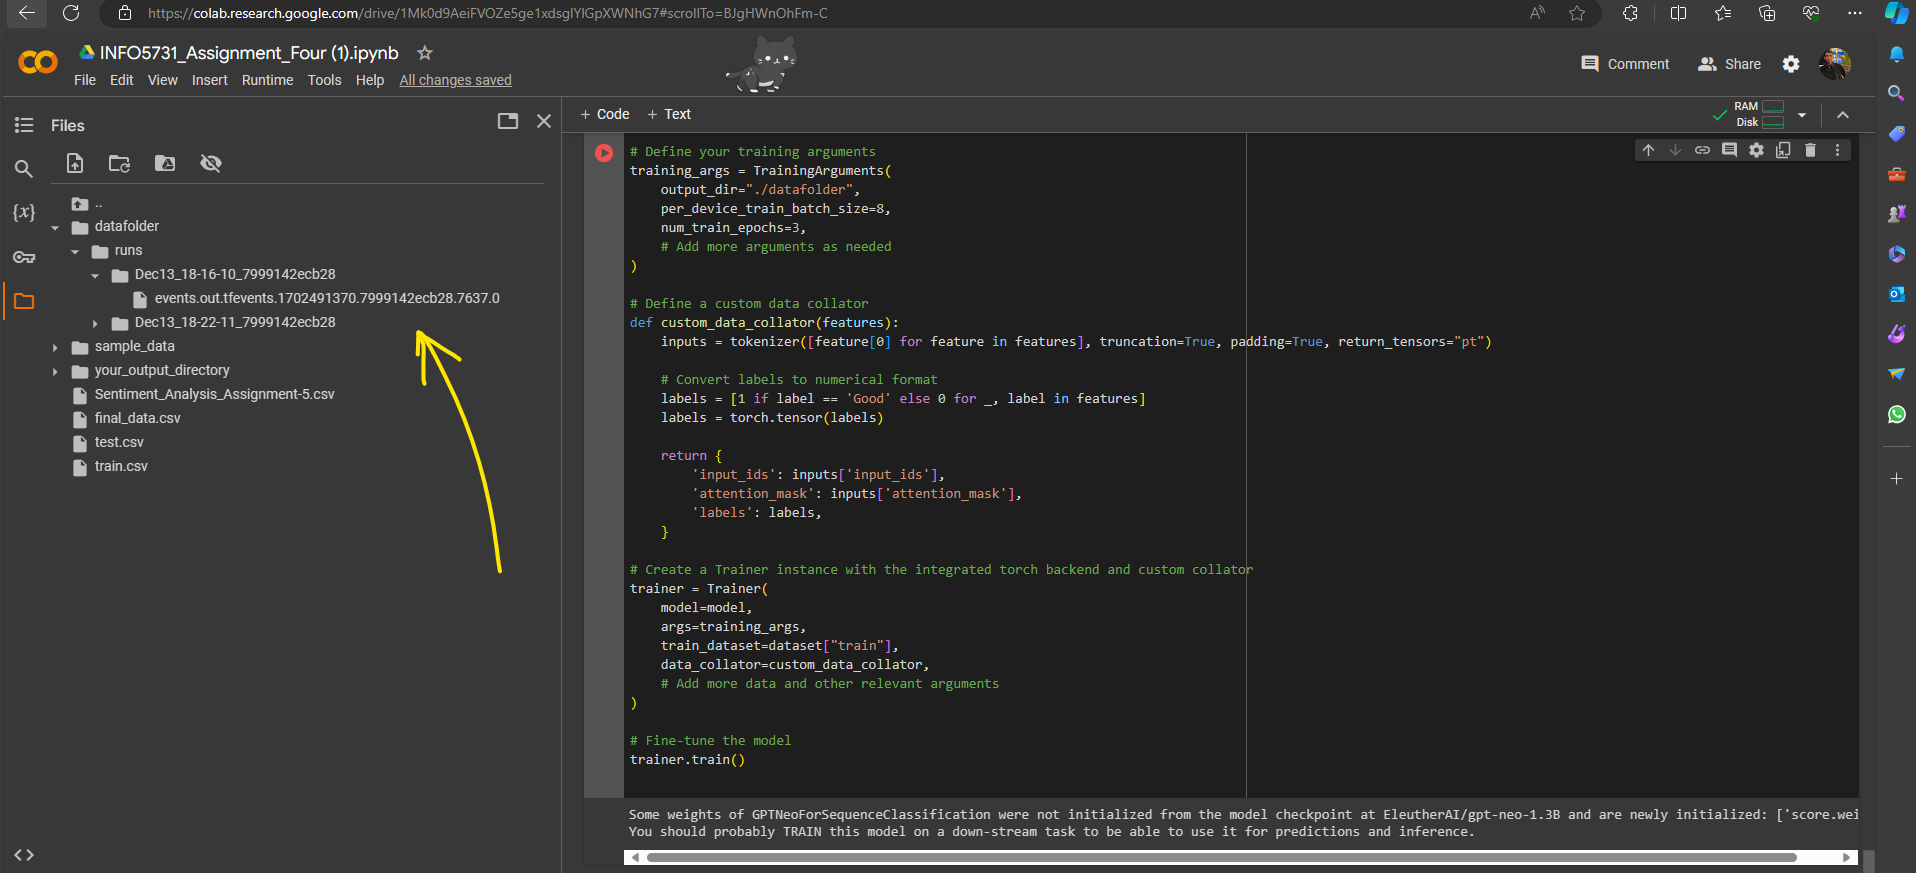